# Practical Example 

### Step 1 :   Import all libs

In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

sns.set(rc={'figure.figsize':(28,16)})
sns.set()

### Step 2 :  Loading raw data

In [268]:
raw_data = pd.read_csv('Real-life-example.csv')
raw_data.shape

(4345, 9)

In [271]:
raw_data.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.00,crossover,0,5.50,Petrol,yes,2016,GLS 63
6,BMW,6100.00,sedan,438,2.00,Gas,yes,1997,320
7,Audi,14200.00,vagon,200,2.70,Diesel,yes,2006,A6
8,Renault,10799.00,vagon,193,1.50,Diesel,yes,2012,Megane
9,Volkswagen,1400.00,other,212,1.80,Gas,no,1999,Golf IV


In [272]:
raw_data.tail(3)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
4342,BMW,8000.00,sedan,194,2.00,Petrol,yes,1985,520
4343,Toyota,14200.00,sedan,31,NaN,Petrol,yes,2014,Corolla
4344,Volkswagen,13500.00,van,124,2.00,Diesel,yes,2013,T5 (Transporter)


### Step 3 :  Exploring Descriptive statistics of the variables

In [273]:
raw_data.describe()

,Price,Mileage,EngineV,Year
count,4173.00,4345.00,4195.00,4345.00
mean,19418.75,161.24,2.79,2006.55
std,25584.24,105.71,5.07,6.72
min,600.00,0.00,0.60,1969.00
25%,6999.00,86.00,1.80,2003.00
50%,11500.00,155.00,2.20,2008.00
75%,21700.00,230.00,3.00,2012.00
max,300000.00,980.00,99.99,2016.00


In [151]:
# But the problem with above data is it gives only numerical values

In [152]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55,NaN
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


## Preprocessing

### Step 4 : Determining the varibale interest

In [153]:
raw_data.describe()

,Price,Mileage,EngineV,Year
count,4173.00,4345.00,4195.00,4345.00
mean,19418.75,161.24,2.79,2006.55
std,25584.24,105.71,5.07,6.72
min,600.00,0.00,0.60,1969.00
25%,6999.00,86.00,1.80,2003.00
50%,11500.00,155.00,2.20,2008.00
75%,21700.00,230.00,3.00,2012.00
max,300000.00,980.00,99.99,2016.00


In [154]:
data = raw_data.drop('Model',axis=1)

In [155]:
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014
4341,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999
4342,BMW,8000.00,sedan,194,2.00,Petrol,yes,1985
4343,Toyota,14200.00,sedan,31,NaN,Petrol,yes,2014


In [156]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00


### Step 5 : Dealing with missing values

In [274]:
data.isnull()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False


In [158]:
data.tail()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
4340,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014
4341,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999
4342,BMW,8000.00,sedan,194,2.00,Petrol,yes,1985
4343,Toyota,14200.00,sedan,31,NaN,Petrol,yes,2014
4344,Volkswagen,13500.00,van,124,2.00,Diesel,yes,2013


In [159]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [160]:
data_no_mv = data.dropna(axis=0)

In [161]:
data_no_mv.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011


In [162]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.00,4025,4025.00,4025.00,4025,4025,4025.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.31,NaN,163.57,2.76,NaN,NaN,2006.38
std,NaN,25815.73,NaN,103.39,4.94,NaN,NaN,6.70
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6999.00,NaN,90.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,158.00,2.20,NaN,NaN,2007.00
75%,NaN,21900.00,NaN,230.00,3.00,NaN,NaN,2012.00


<AxesSubplot: xlabel='Price', ylabel='Count'>

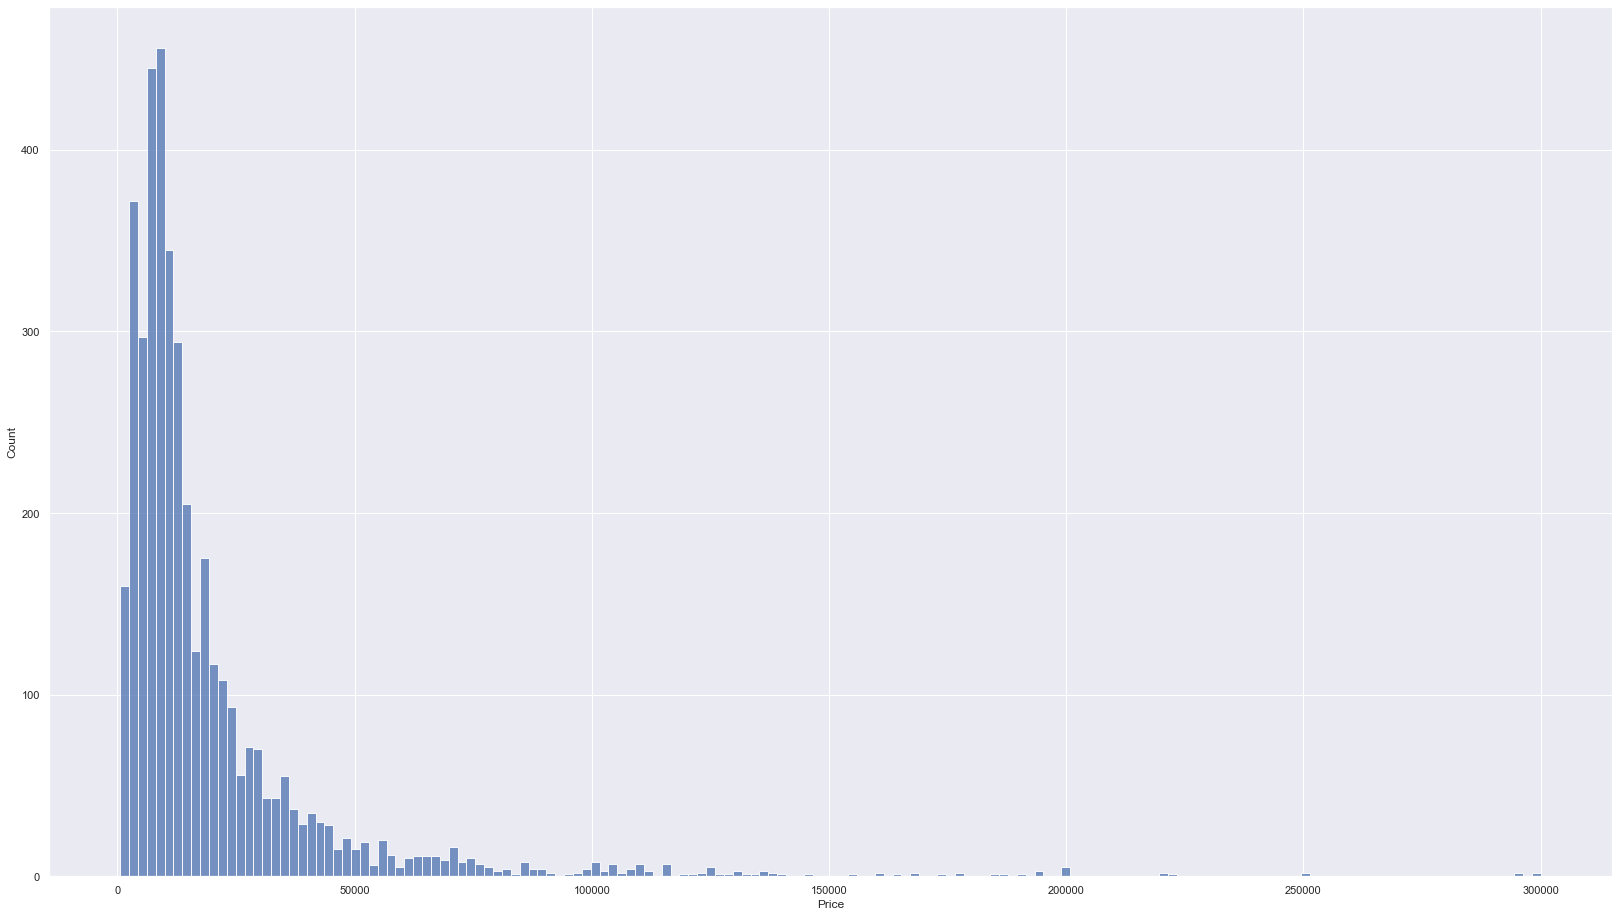

In [275]:
sns.histplot(data_no_mv['Price'])

### Dealing with outliers( Remove all outliers using Quantile)

In [276]:
q = data_no_mv['Price'].quantile(0.98)
q

103999.0

In [277]:
data_no_mv

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014
4340,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014
4341,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999
4342,BMW,8000.00,sedan,194,2.00,Petrol,yes,1985


In [278]:
data_1 = data_no_mv[ data_no_mv['Price'] < q ]

<AxesSubplot: xlabel='Price', ylabel='Count'>

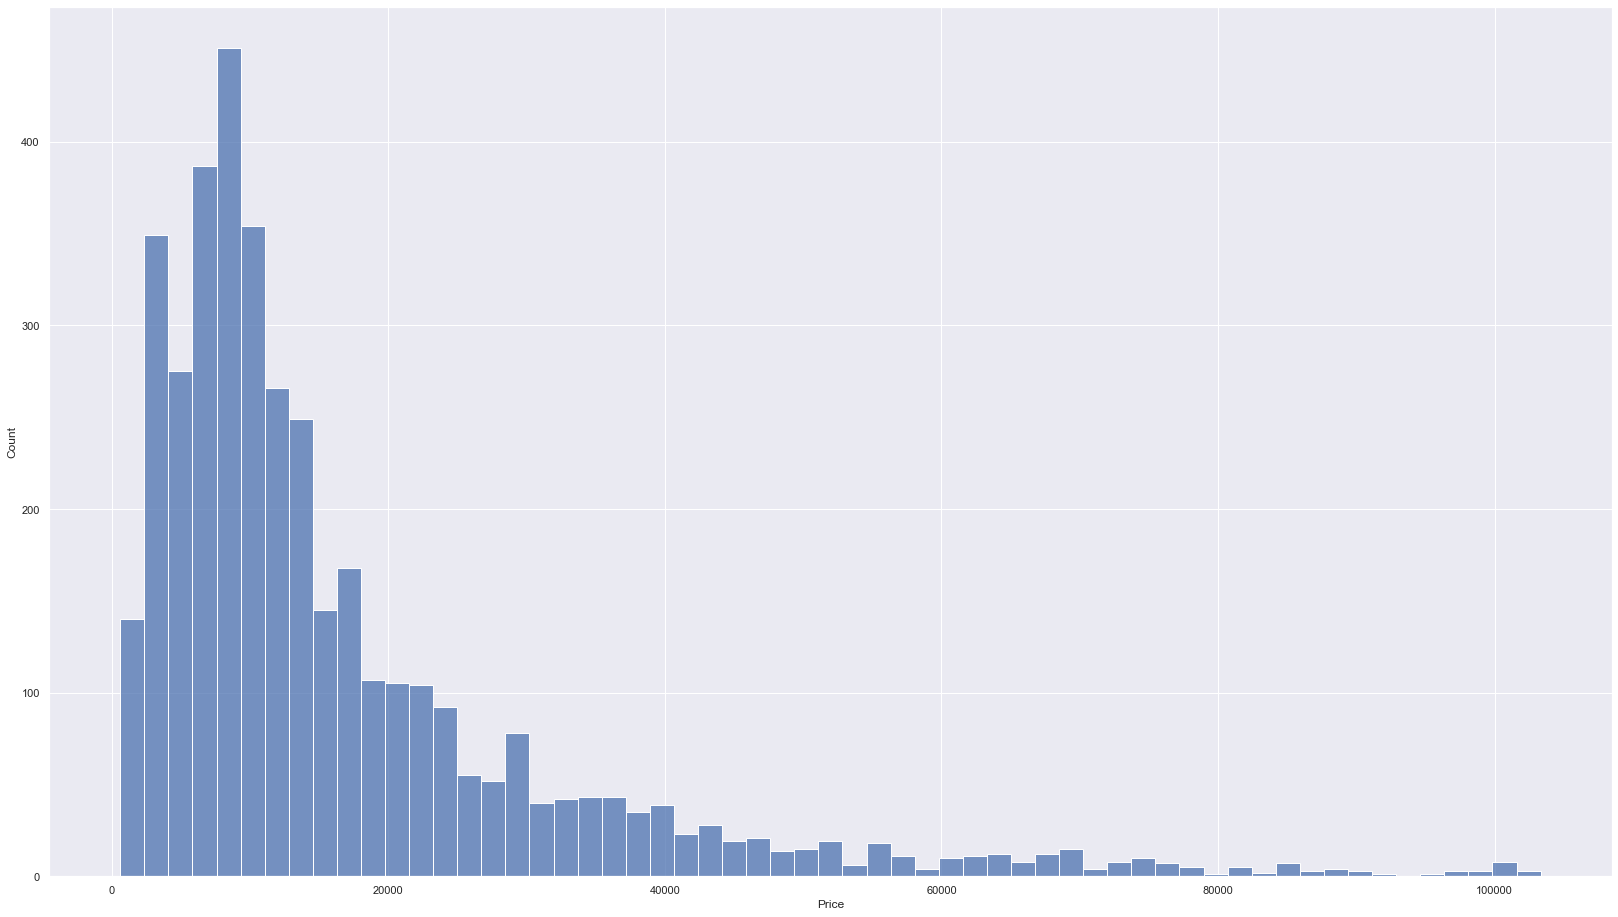

In [279]:
sns.histplot(data_1['Price'])

<AxesSubplot: xlabel='Mileage', ylabel='Count'>

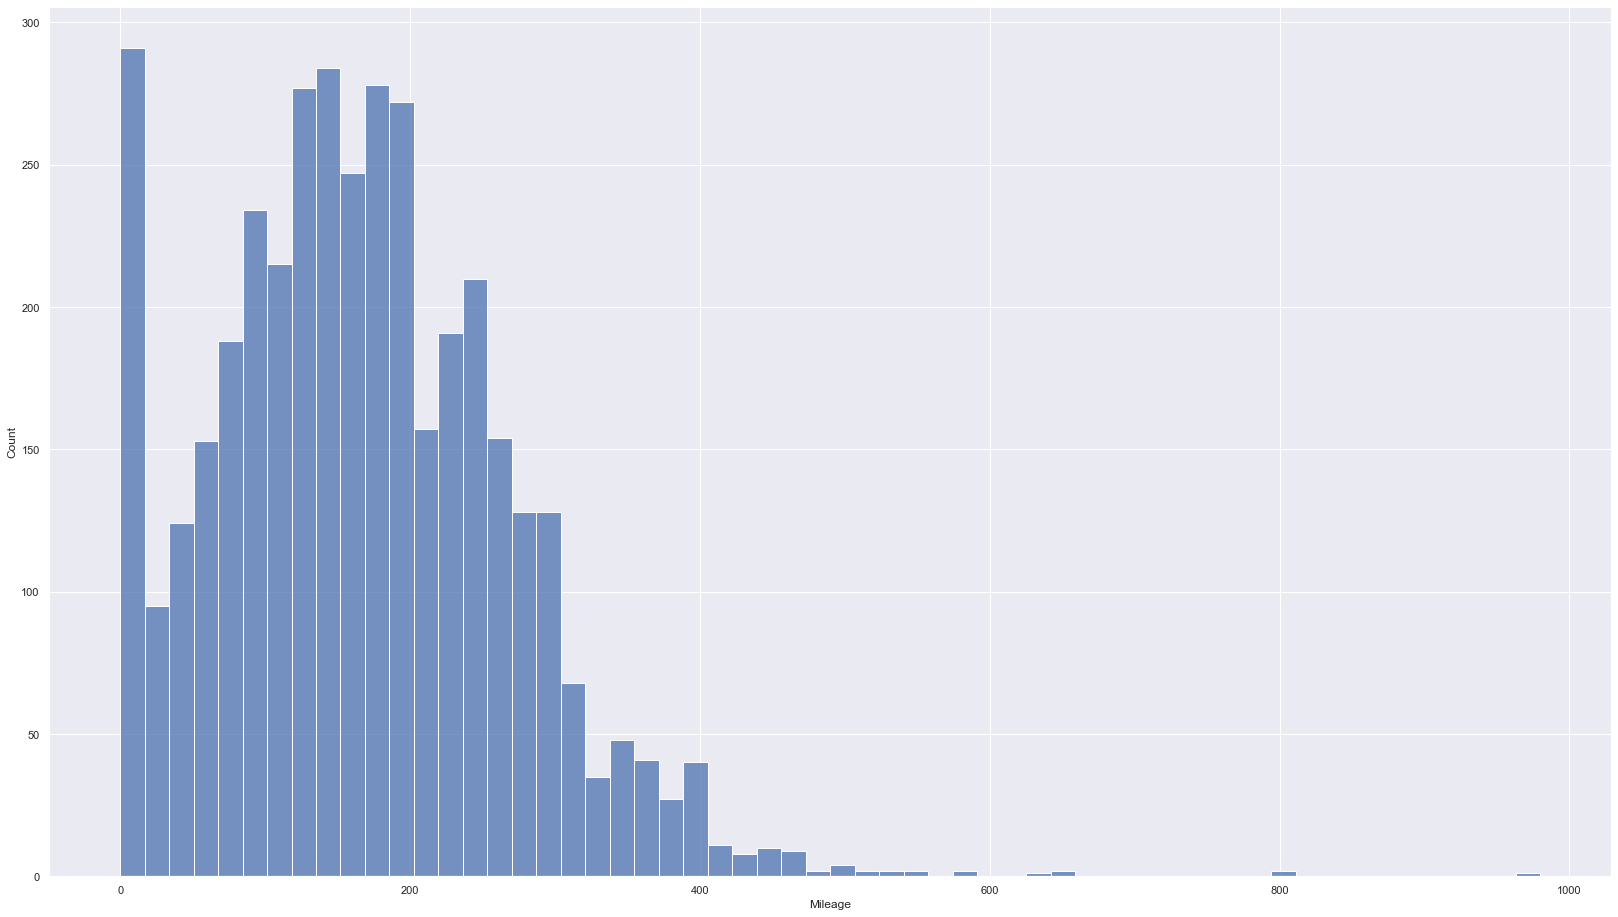

In [280]:
sns.histplot(data_1['Mileage'])

In [169]:
q = data_1['Mileage'].quantile(0.98) #  99 PERCENTILE
q

400.0

In [281]:
data_2= data_1[data_1['Mileage'] < q ]

<AxesSubplot: xlabel='Mileage', ylabel='Count'>

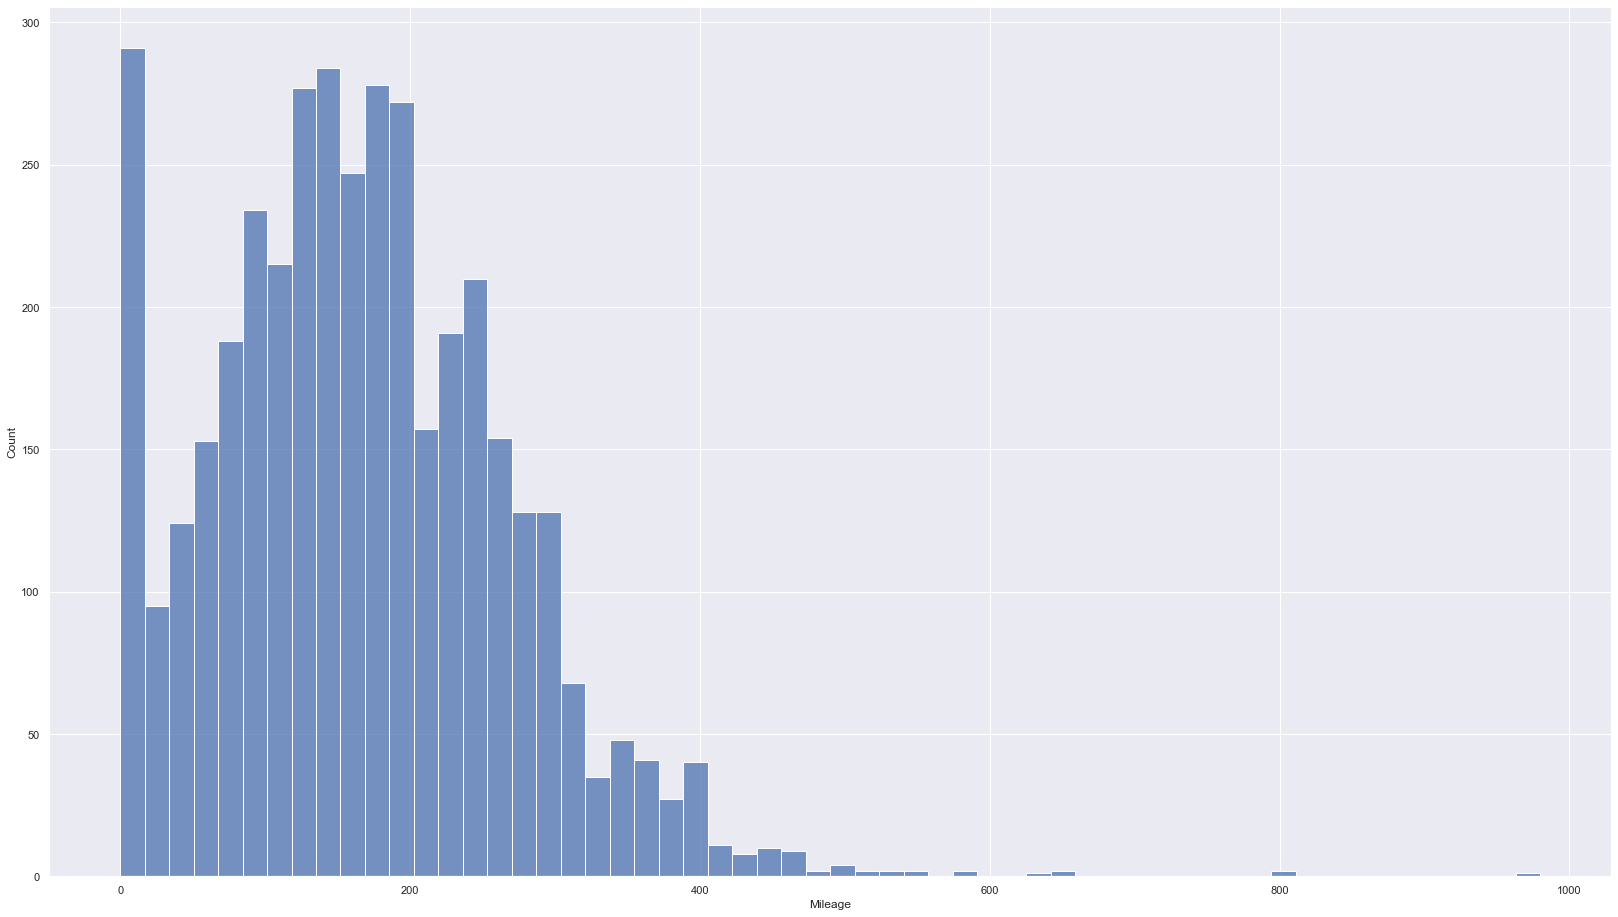

In [282]:
sns.histplot(data_2['Mileage'])

<AxesSubplot: xlabel='EngineV', ylabel='Count'>

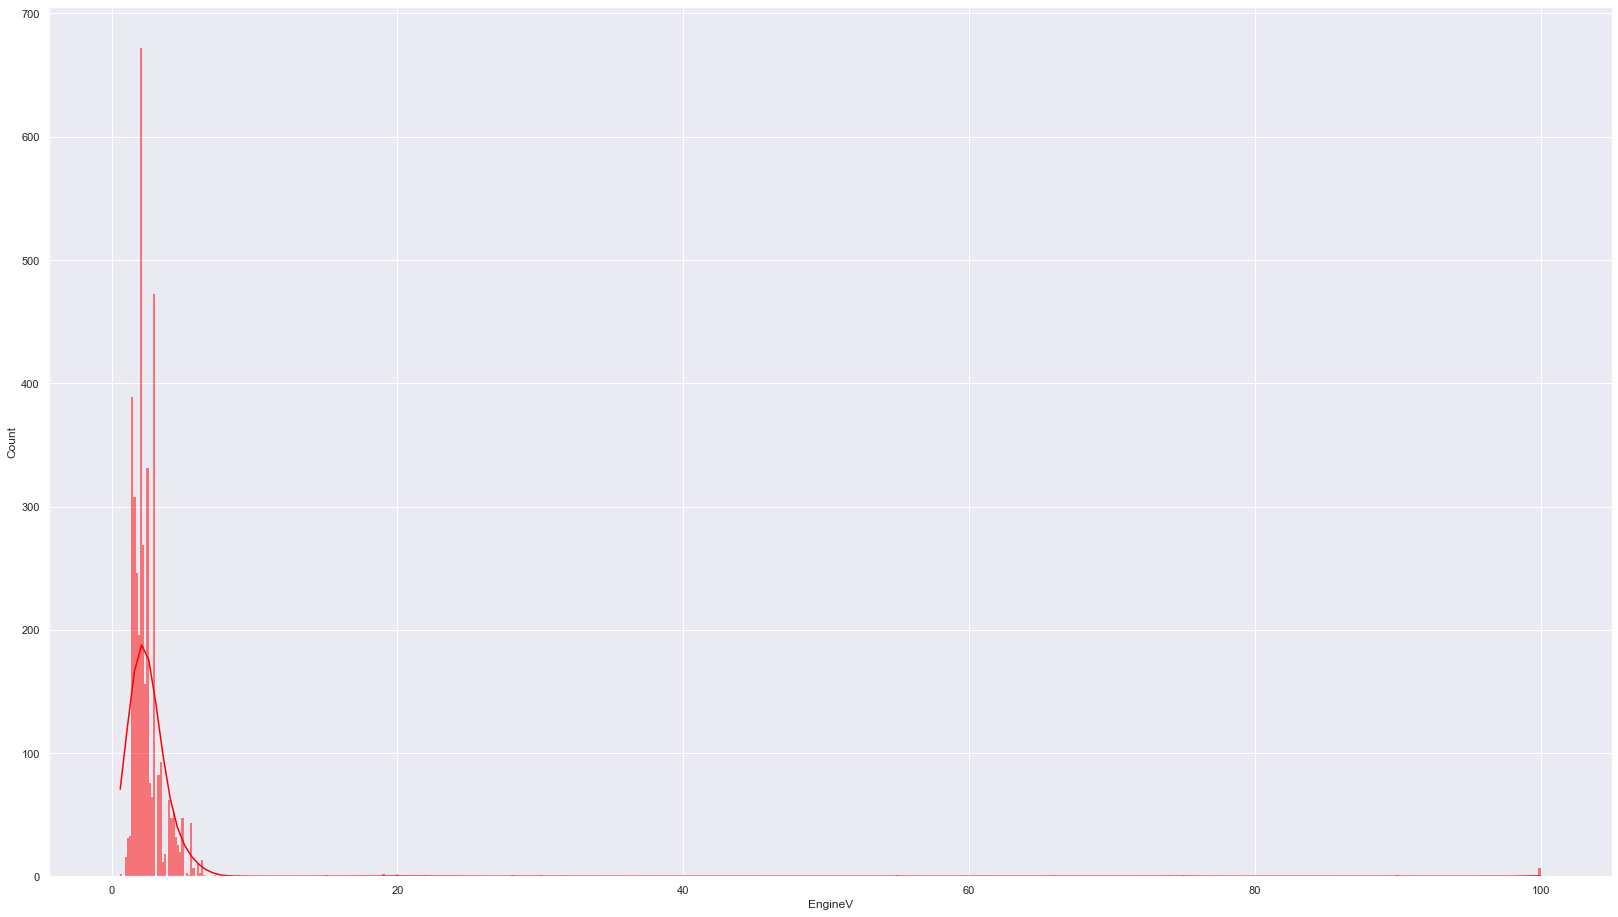

In [172]:
sns.histplot(data_2['EngineV'], color="red", kde=True,  linewidth=0)

In [173]:
data_3 = data_2[data_2['EngineV'] < 6.5 ]

<AxesSubplot: xlabel='EngineV', ylabel='Count'>

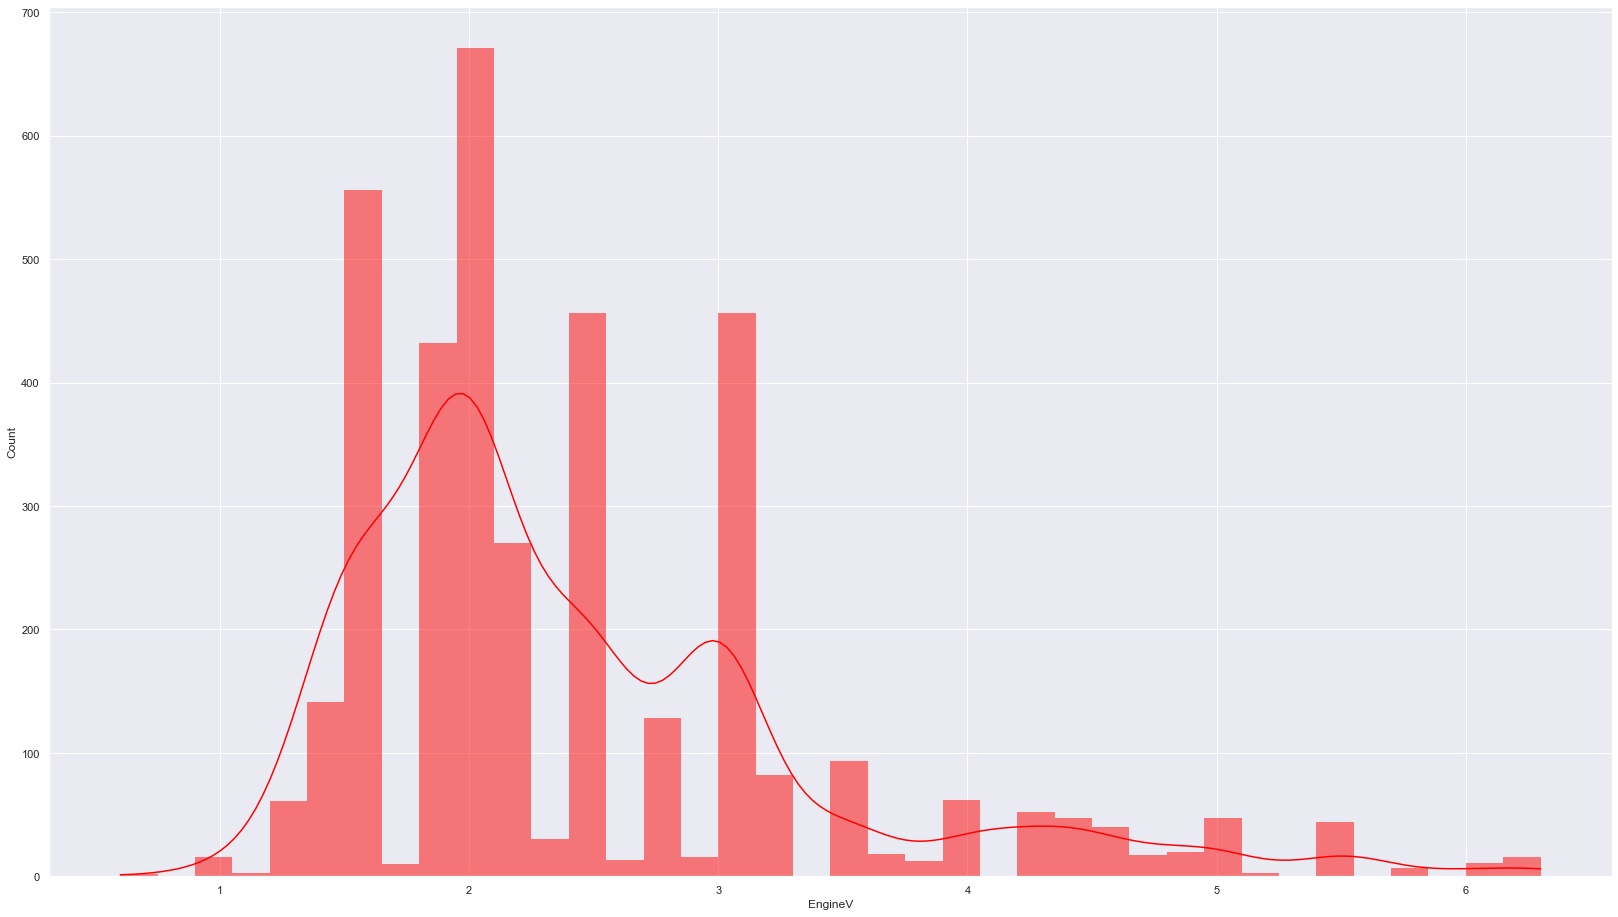

In [174]:
sns.histplot(data_3['EngineV'], color="red", kde=True,  linewidth=0)

<AxesSubplot: xlabel='Year', ylabel='Count'>

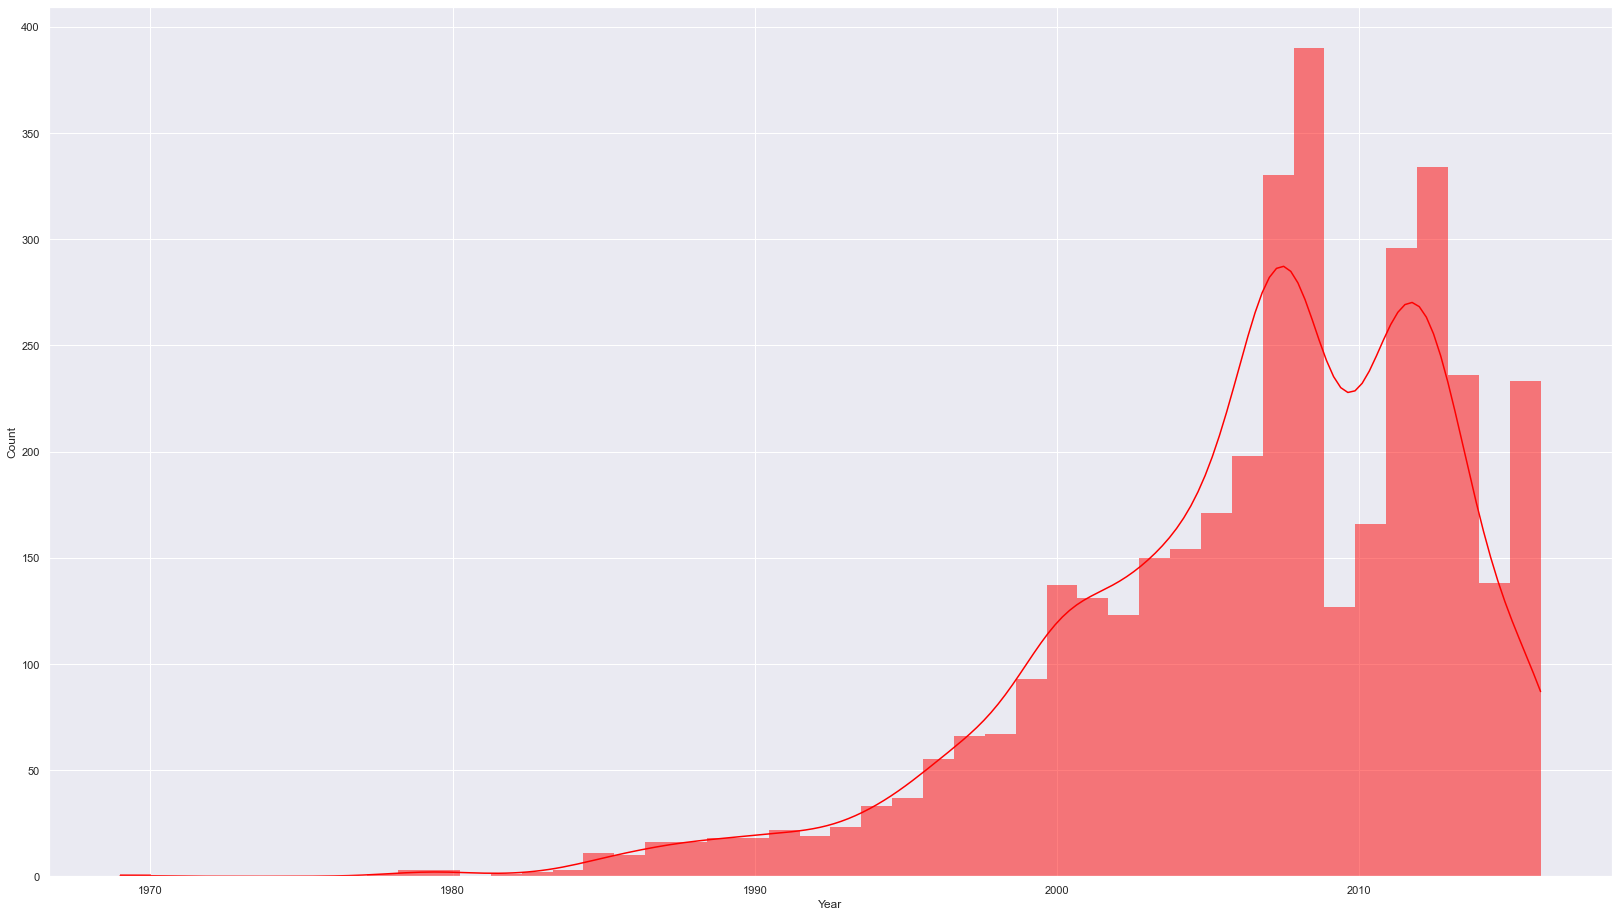

In [175]:
sns.histplot(data_3['Year'], color='red',kde=True, linewidth=0)

In [176]:
q = data_3['Year'].quantile(0.1) # 10 PERCENTILE
q

1998.0

In [177]:
data_4 = data_3[ data_3['Year'] > q ]
data_4

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011
7,Audi,14200.00,vagon,200,2.70,Diesel,yes,2006
8,Renault,10799.00,vagon,193,1.50,Diesel,yes,2012
...,...,...,...,...,...,...,...,...
4337,Renault,6800.00,sedan,152,1.60,Petrol,yes,2007
4338,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008
4339,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014
4341,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999


<AxesSubplot: xlabel='Year', ylabel='Count'>

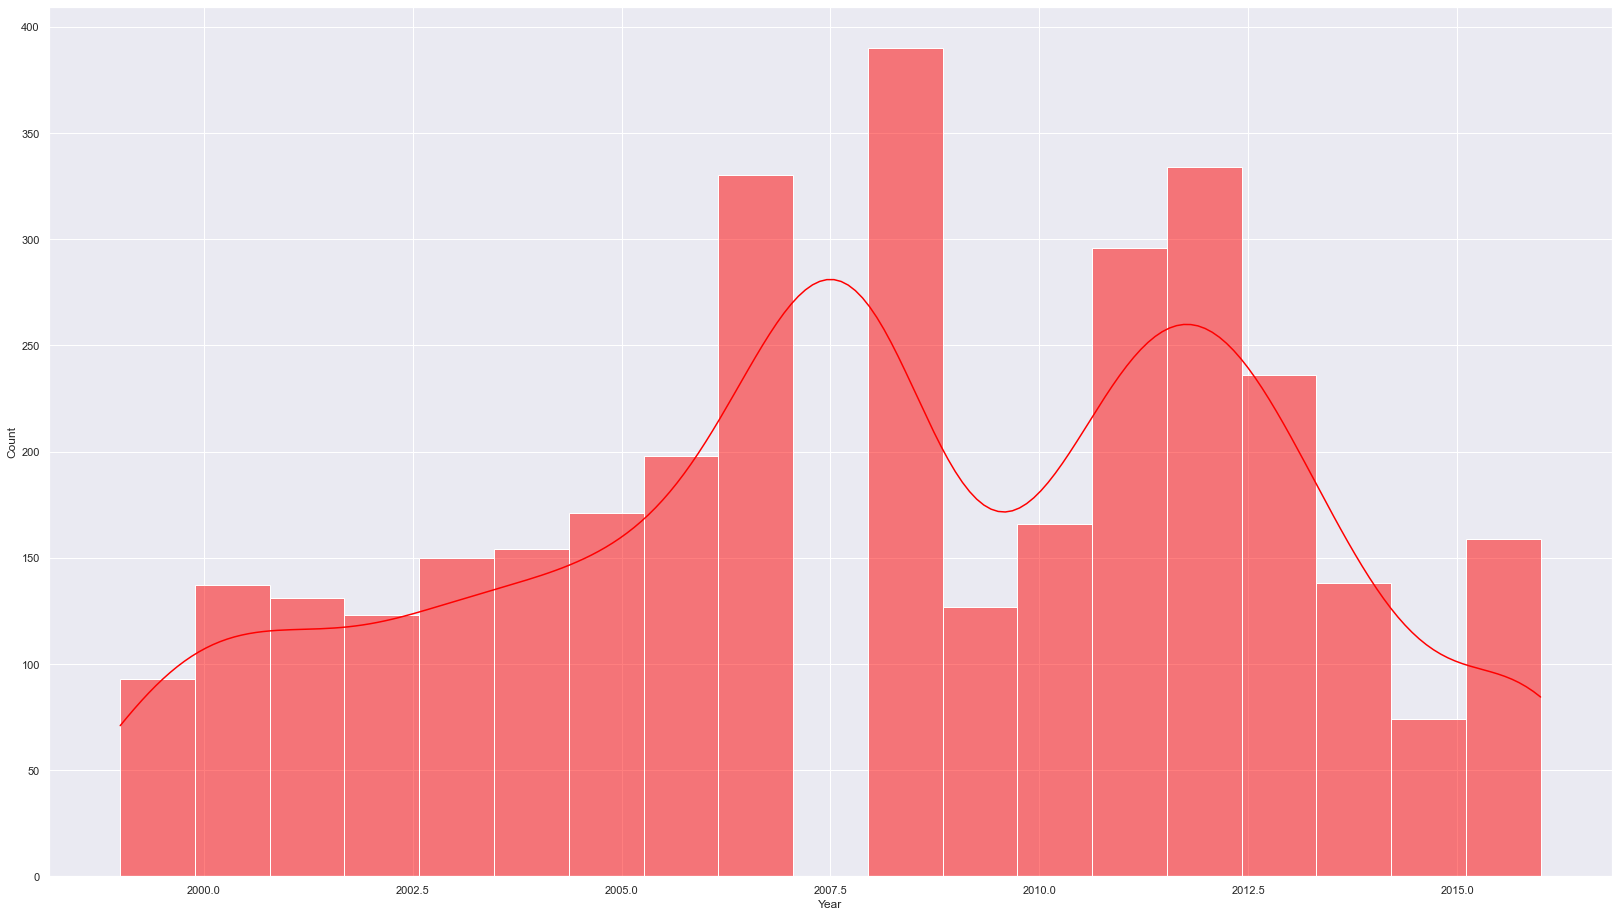

In [178]:
sns.histplot(data_4['Year'], color='red',kde=True, linewidth=1)

In [179]:
# data_4.drop('Registration',axis=1,inplace=True)

In [180]:
data_cleaned = data_4

In [283]:
data_cleaned = data_cleaned.reset_index(drop=True)

In [284]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,9.50
1,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,10.04
2,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,9.81
3,Audi,14200.00,vagon,200,2.70,Diesel,yes,2006,9.56
4,Renault,10799.00,vagon,193,1.50,Diesel,yes,2012,9.29
...,...,...,...,...,...,...,...,...,...
3402,Renault,6800.00,sedan,152,1.60,Petrol,yes,2007,8.82
3403,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008,9.35
3404,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014,9.79
3405,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999,8.78


Text(0.5, 1.0, 'Price vs Mileage')

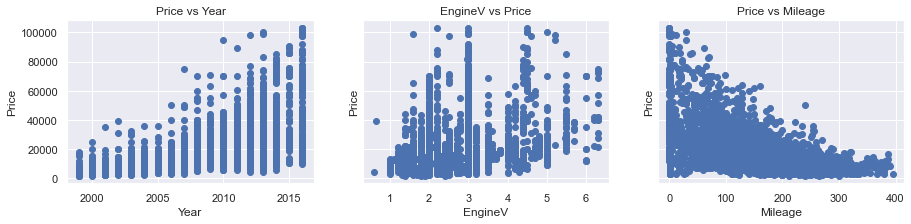

In [183]:
f,(ax1, ax2, ax3) = plt.subplots(1,3,sharey=True,figsize=(15,3))

# Price vs Year
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_xlabel('Year')
ax1.set_ylabel('Price')
ax1.set_title('Price vs Year')

# EngineV vs Year
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_xlabel('EngineV')
ax2.set_ylabel('Price')
ax2.set_title('EngineV vs Price')


# Mileage Vs Price
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_xlabel('Mileage')
ax3.set_ylabel('Price')
ax3.set_title('Price vs Mileage')

<AxesSubplot: xlabel='Price', ylabel='Count'>

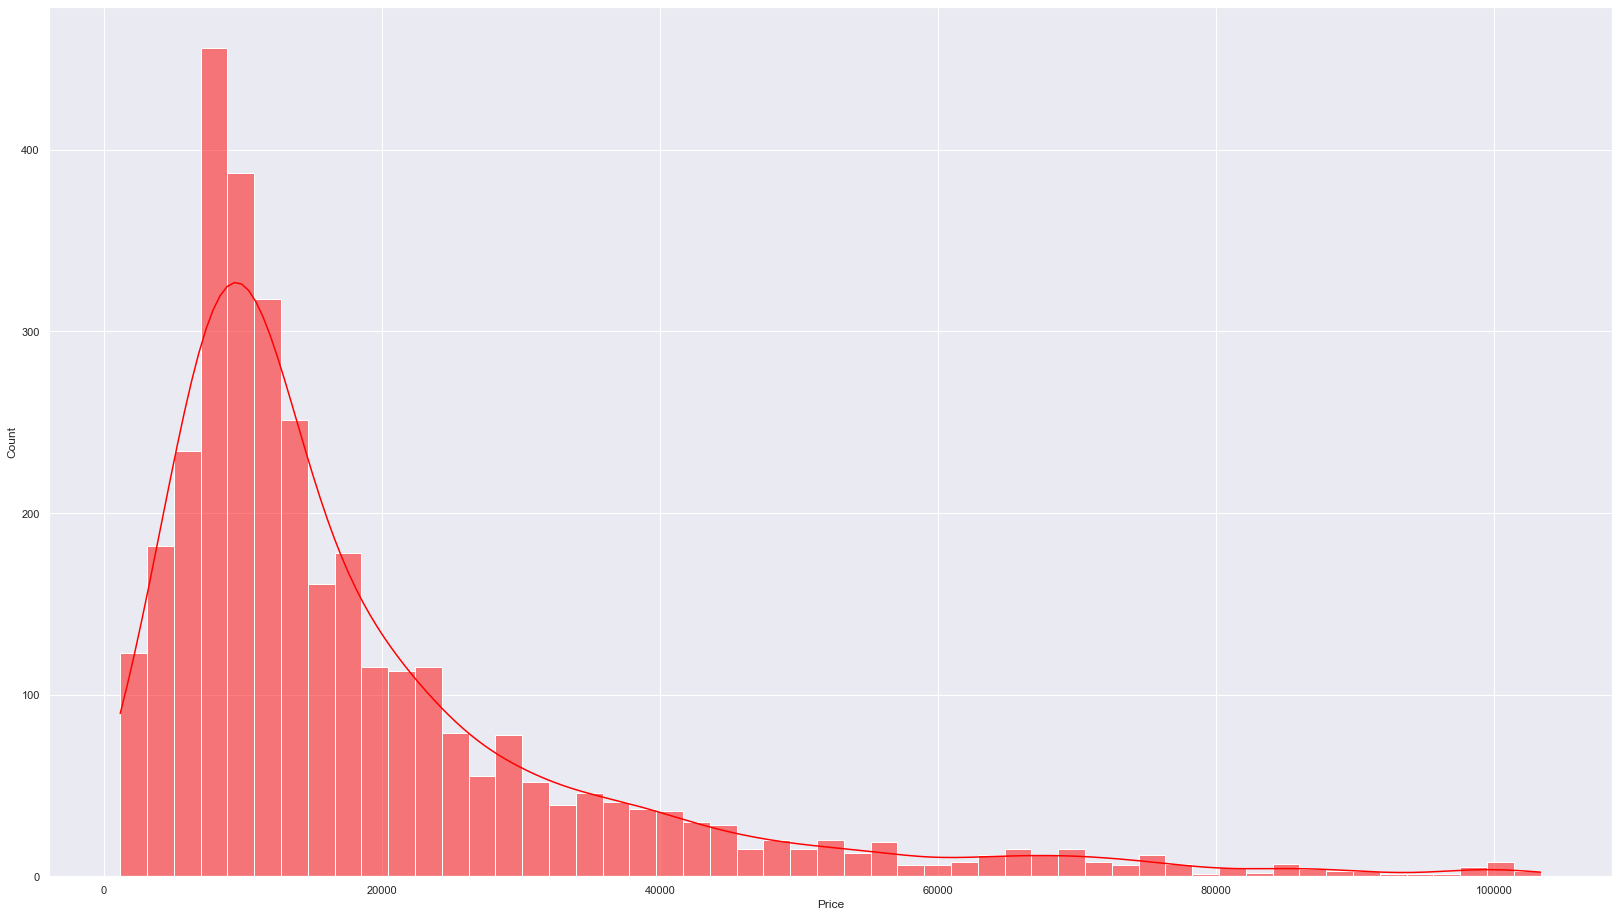

In [184]:
sns.histplot(data_cleaned['Price'], color='red',kde=True, linewidth=1)

In [185]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,9.50
1,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,10.04
2,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,9.81
3,Audi,14200.00,vagon,200,2.70,Diesel,yes,2006,9.56
4,Renault,10799.00,vagon,193,1.50,Diesel,yes,2012,9.29
...,...,...,...,...,...,...,...,...,...
3402,Renault,6800.00,sedan,152,1.60,Petrol,yes,2007,8.82
3403,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008,9.35
3404,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014,9.79
3405,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999,8.78


In [265]:
data_cleaned['Engine Type'].unique().tolist()

['Gas', 'Petrol', 'Diesel', 'Other']

<AxesSubplot: xlabel='log_price', ylabel='Count'>

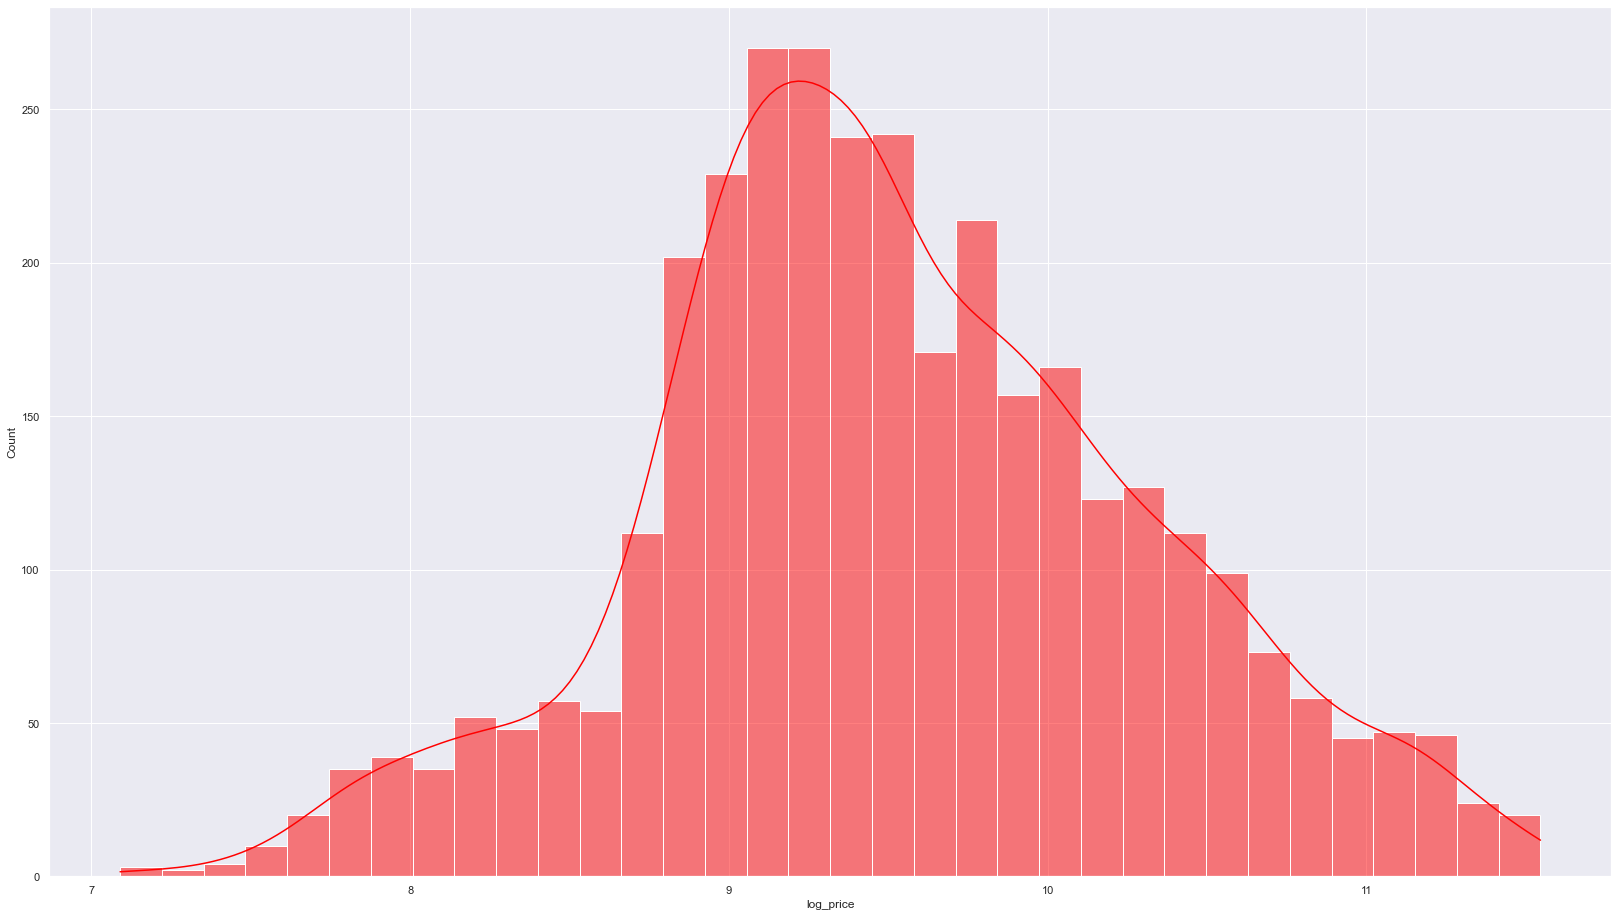

In [186]:
sns.histplot(data_cleaned['log_price'], color='red',kde=True, linewidth=1)

Text(0.5, 1.0, 'Log Price vs Mileage')

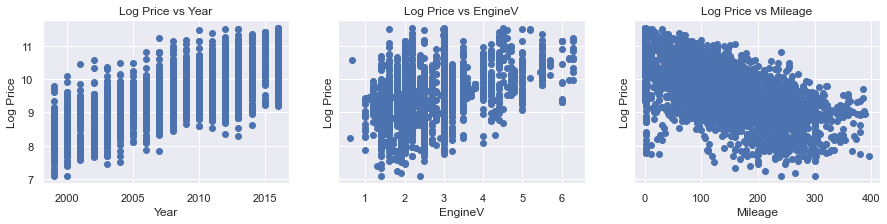

In [187]:
f,(ax1, ax2, ax3) = plt.subplots(1,3,sharey=True,figsize=(15,3))

# Price vs Year
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_xlabel('Year')
ax1.set_ylabel('Log Price')
ax1.set_title('Log Price vs Year')

# EngineV vs Year
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_xlabel('EngineV')
ax2.set_ylabel('Log Price')
ax2.set_title('Log Price vs EngineV')


# Mileage Vs Price
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_xlabel('Mileage')
ax3.set_ylabel('Log Price')
ax3.set_title('Log Price vs Mileage')

In [188]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,9.50
1,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,10.04
2,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,9.81
3,Audi,14200.00,vagon,200,2.70,Diesel,yes,2006,9.56
4,Renault,10799.00,vagon,193,1.50,Diesel,yes,2012,9.29
...,...,...,...,...,...,...,...,...,...
3402,Renault,6800.00,sedan,152,1.60,Petrol,yes,2007,8.82
3403,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008,9.35
3404,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014,9.79
3405,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999,8.78


## Linear Regression Assumptions :

### We Need to check if we are not violating these assumptions in order to retain Linear Regression:

- 1.Linearity : Model Must be linear
- 2.Multicolinearity : Model should not be multicolinear we use vif [Varience inflation factor] for that.Multiple regression assumes that the independent variables are not highly correlated with each other.
- 3.Independence [No Endogenity]
- 4.Normality of Residuals : By plotting and by PP or QQ plots. Mean of residuals should be zero
- 5.Homoscedasticity or Constant CO-Variance :  A condition in which the variance of the residual, or error term, in a regression model is constant. 

In [189]:
def plot_correlation(df:pd.DataFrame, numerical_features, target,  k):
    cols = df[numerical_features].corr().nlargest(k,target)[target].index
    cm = df[cols].corr()
    plt.figure(figsize=(10,6))
    return sns.heatmap(cm,annot=True,cmap='binary')

In [190]:
def generate_x_y_numeric_targets(df: pd.DataFrame,target):
    numerical_feature_columns = list(df._get_numeric_data().columns)
    X = df.loc[: , df.columns!=target].values
    Y = df.loc[: , df.columns==target].values
    return numerical_feature_columns,X,Y

<AxesSubplot: >

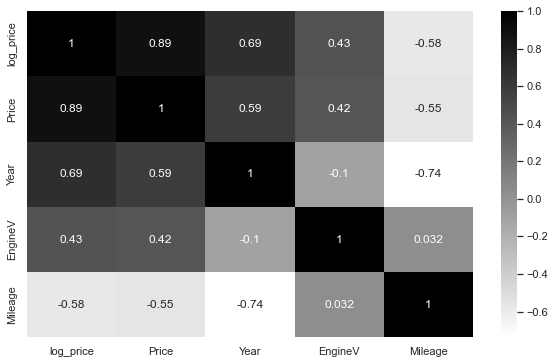

In [285]:
target = 'log_price'

numerical_cols, X, Y = generate_x_y_numeric_targets(data_cleaned, target)
plot_correlation(data_cleaned,numerical_cols,target,5)

In [192]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[['Mileage','EngineV','Year']]

vif = pd.DataFrame()
vif['Features'] =  ['Mileage','EngineV','Year']
vif['VIF'] = [variance_inflation_factor(variables.values ,i)  for i in range(variables.shape[1])]

vif

# if vif is greater than 5 then data is little colinear 
# if ---- 5<vif then more colinear
# if ----- 10<vif thant unacceptable


,Features,VIF
0,Mileage,4.07
1,EngineV,7.38
2,Year,10.11


In [193]:
data_cleaned['Brand'].unique().tolist()

['Mercedes-Benz',
 'Audi',
 'Toyota',
 'Renault',
 'Volkswagen',
 'BMW',
 'Mitsubishi']

In [194]:
# Lets Drop the year as its not useful

In [195]:
data_no_multicolinearity  = data_cleaned.drop('Year',axis=1)

In [196]:
data_no_multicolinearity.shape

(3407, 8)

## Create Dummy Variables :

In [197]:
data_with_dummies = pd.get_dummies(data_no_multicolinearity,drop_first=True)

In [198]:
data_with_dummies.shape

(3407, 19)

In [286]:
data_no_multicolinearity

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,9.50
1,Audi,23000.00,crossover,240,4.20,Petrol,yes,10.04
2,Toyota,18300.00,crossover,120,2.00,Petrol,yes,9.81
3,Audi,14200.00,vagon,200,2.70,Diesel,yes,9.56
4,Renault,10799.00,vagon,193,1.50,Diesel,yes,9.29
...,...,...,...,...,...,...,...,...
3402,Renault,6800.00,sedan,152,1.60,Petrol,yes,8.82
3403,Volkswagen,11500.00,van,163,2.50,Diesel,yes,9.35
3404,Toyota,17900.00,sedan,35,1.60,Petrol,yes,9.79
3405,BMW,6500.00,sedan,1,3.50,Petrol,yes,8.78


In [199]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

data_variable_forvif = data_with_dummies.drop(['Price','log_price'],axis=1)

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(data_variable_forvif.values ,i)  for i in range(data_variable_forvif.shape[1])]
vif['Features'] =  data_variable_forvif.columns.tolist()

vif


,VIF,Features
0,4.87,Mileage
1,8.23,EngineV
2,2.23,Brand_BMW
3,2.88,Brand_Mercedes-Benz
4,1.73,Brand_Mitsubishi
5,2.25,Brand_Renault
6,2.34,Brand_Toyota
7,2.98,Brand_Volkswagen
8,1.44,Body_hatch
9,1.53,Body_other


In [200]:
data_with_dummies.head(5)

,Price,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,13300.00,358,5.00,9.50,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
1,23000.00,240,4.20,10.04,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,18300.00,120,2.00,9.81,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
3,14200.00,200,2.70,9.56,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,10799.00,193,1.50,9.29,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


In [201]:
data_variable_forvif.shape[1]

17

In [202]:
# (data_no_multicolinearity.shape[0] - data_no_multicolinearity.loc[ data_no_multicolinearity['Registration']=='yes' ].shape[0])/data_no_multicolinearity.shape[0] * 100

In [203]:
data_with_dummies.drop(['Price'],axis=1,inplace=True)

In [204]:
data_with_dummies.columns

Index(['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [205]:
cols = ['log_price','Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol']

In [206]:
cols

['log_price',
 'Mileage',
 'EngineV',
 'Brand_BMW',
 'Brand_Mercedes-Benz',
 'Brand_Mitsubishi',
 'Brand_Renault',
 'Brand_Toyota',
 'Brand_Volkswagen',
 'Body_hatch',
 'Body_other',
 'Body_sedan',
 'Body_vagon',
 'Body_van',
 'Engine Type_Gas',
 'Engine Type_Other',
 'Engine Type_Petrol']

In [207]:
data_preprocessed = data_with_dummies[cols]

In [208]:
data_preprocessed

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,9.50,358,5.00,0,1,0,0,0,0,0,0,1,0,0,1,0,0
1,10.04,240,4.20,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,9.81,120,2.00,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,9.56,200,2.70,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,9.29,193,1.50,0,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3402,8.82,152,1.60,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3403,9.35,163,2.50,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3404,9.79,35,1.60,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3405,8.78,1,3.50,1,0,0,0,0,0,0,0,1,0,0,0,0,1


### OUR EDA PART HAS FINISHED NOW 🙌✊🥳🎉👏

# Model Training :

# Training Linear Regression Model :

###  Declare inputs and target variables 

In [288]:
targets = data_preprocessed['log_price'] # y

inputs = data_preprocessed.drop(['log_price'],axis=1) # x1 x2 x3....


### Scale the data :

In [289]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(inputs)


inputs_scaled = scaler.transform(inputs)

# Our scaled inputs
inputs_scaled

import pickle


with open("Scaler.pickle","wb") as file_handle:
    pickle.dump(scaler, file_handle, pickle.HIGHEST_PROTOCOL)
    
    

In [211]:
inputs_scaled

array([[ 2.46966851,  2.61906207, -0.41812389, ...,  2.54069719,
        -0.16472083, -0.7402248 ],
       [ 1.07683593,  1.79601239, -0.41812389, ..., -0.39359275,
        -0.16472083,  1.35094095],
       [-0.33960397, -0.4673742 , -0.41812389, ..., -0.39359275,
        -0.16472083,  1.35094095],
       ...,
       [-1.34291557, -0.87889904, -0.41812389, ..., -0.39359275,
        -0.16472083,  1.35094095],
       [-1.74424021,  1.07584393,  2.39163565, ..., -0.39359275,
        -0.16472083,  1.35094095],
       [-0.29238931, -0.4673742 , -0.41812389, ..., -0.39359275,
        -0.16472083, -0.7402248 ]])

In [290]:
len(inputs.columns)

16

In [291]:
np.exp(targets[:1]), targets[:1]

(0   13300.00
 Name: log_price, dtype: float64,
 0   9.50
 Name: log_price, dtype: float64)

- Note : Its not recommeneded to standardize the categorial  variables. In fact many practitioners strongly argue to not to do that

## Train Test Split

In [292]:
from sklearn.model_selection import train_test_split

x_training, x_testing, y_training, y_testing = train_test_split(inputs_scaled,targets,test_size=0.2,random_state=343)



In [293]:
len( x_training[0] )

16

# Create the Regression

In [294]:
# Our Log linear regression is ready
reg = LinearRegression()
reg.fit(x_training,y_training)

LinearRegression()

In [295]:
y_hat = reg.predict(x_training)

In [296]:
y_hat

array([ 9.26190826,  8.33177032, 10.59803927, ...,  8.40303988,
        9.84277868,  8.94508281])

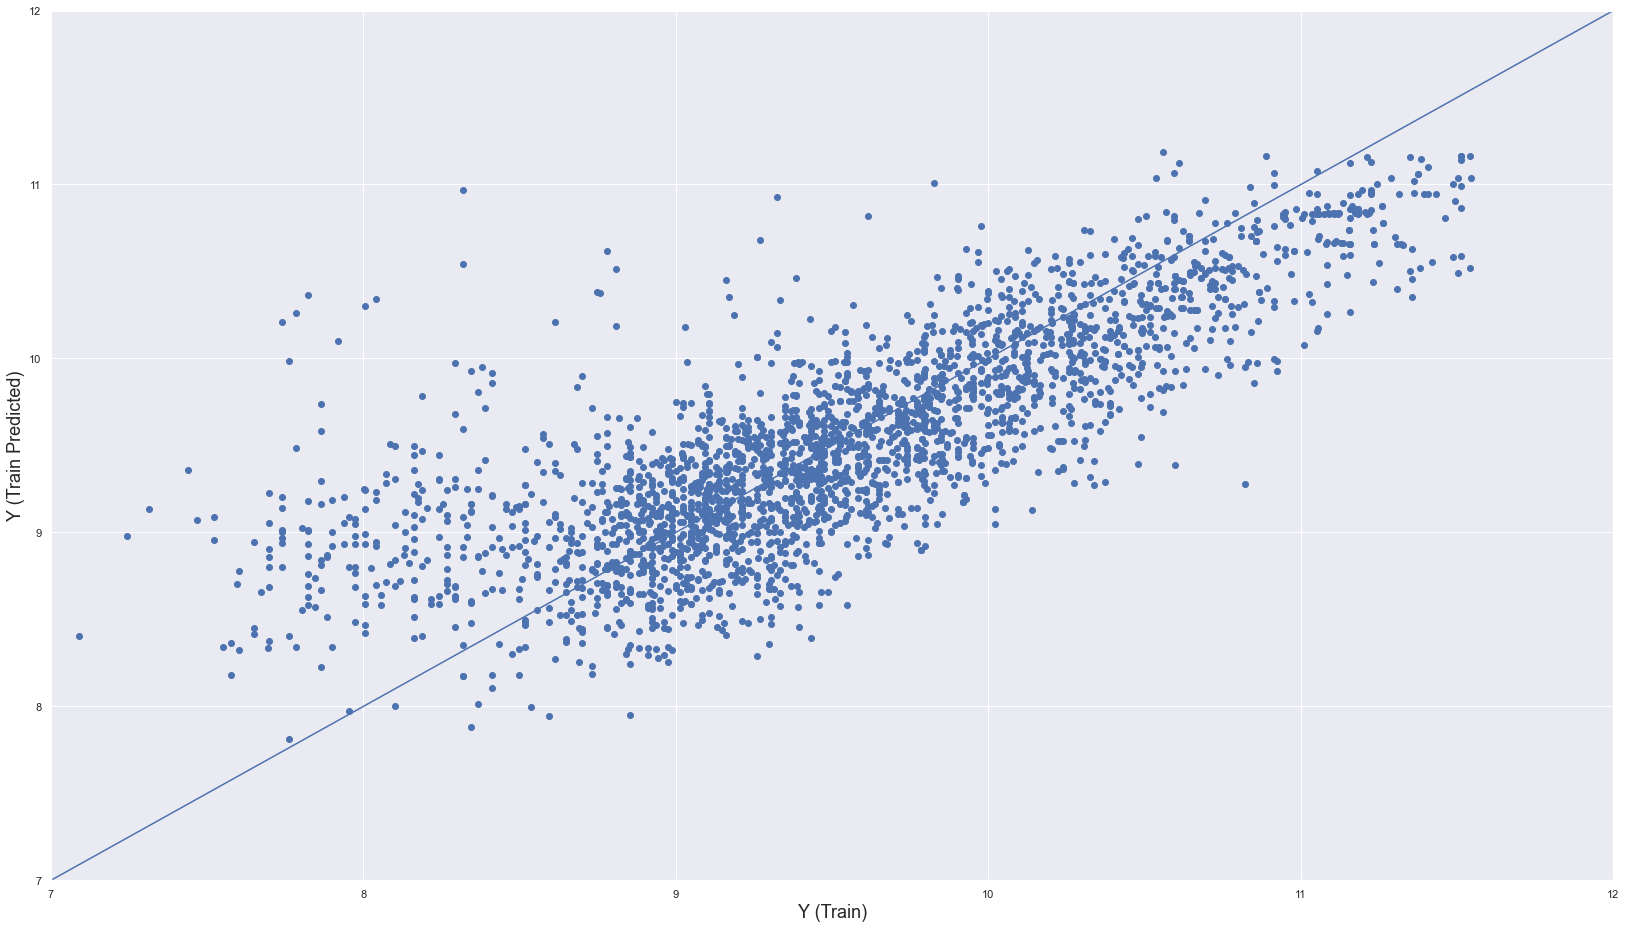

In [297]:
plt.scatter(y_training,y_hat)
plt.axline([0, 0], [1, 1])
plt.xlabel('Y (Train)',size=18)
plt.ylabel('Y (Train Predicted)',size=18)
plt.xlim(7,12)
plt.ylim(7,12)
plt.show()

### One of Assumption of Linear Regression : Error should be normally distributed

Text(0.5, 1.0, 'Probability Density Function (PDF) Residual')

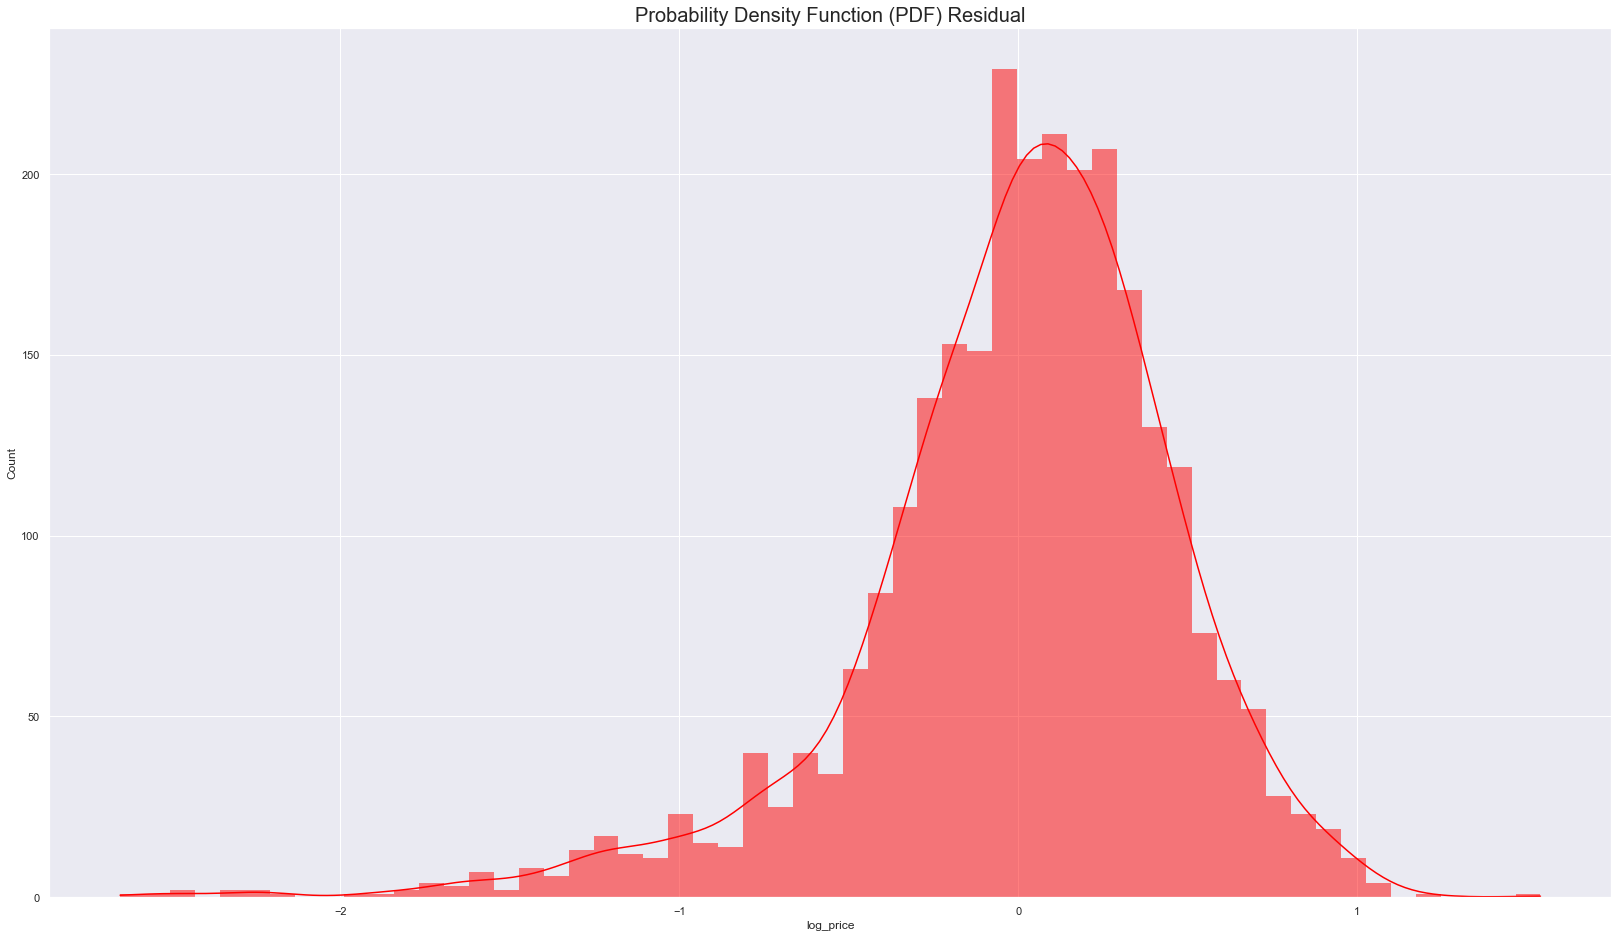

In [298]:
#             ya - yp
sns.histplot(y_training-y_hat, color="red", kde=True,  linewidth=0)
plt.title("Probability Density Function (PDF) Residual",size=20)

In [221]:
np.round( np.mean((y_training-y_hat)),decimals=5) 

-0.0

In [222]:
# Longer tail over-estimate the target
# no tail - rarely underestimate the target

## Calculate R-Squared value :

In [300]:
r2 = reg.score(x_training,y_training)
r2

0.6412499724883037

In [303]:
r2test = reg.score(x_testing,y_testing)
r2test

0.6533763618939223

## Calculate R value :

In [301]:
r = r2 ** 0.5
r

0.8007808517243052

In [304]:
rtest = r2test ** 0.5
rtest

0.8083169934462112

### Formula for Adjusted R^2



$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

In [302]:
n = x_training.shape[0]
p = x_training.shape[1]
arsq =  1 - (1-r2) * (n-1)/(n-p-1)
arsq

0.639130326830923

## Adjusted R Value

In [226]:
adjr =  arsq ** 0.5
adjr

0.7994562694925363

In [227]:
x_training.shape

(2725, 16)

# Lets calculate weights and biases:

### Weights :

In [228]:
reg.intercept_

9.519079412312276

In [229]:
reg.coef_

array([-0.46655346,  0.21668969,  0.03959904,  0.03466801, -0.12588785,
       -0.14978921, -0.04121533, -0.04524935, -0.14592649, -0.08730718,
       -0.17786879, -0.1442058 , -0.12813631, -0.04535205, -0.02790205,
       -0.08321545])

In [230]:
reg_summery = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summery['Weights'] = reg.coef_

In [231]:
reg_summery

,Features,Weights
0,Mileage,-0.47
1,EngineV,0.22
2,Brand_BMW,0.04
3,Brand_Mercedes-Benz,0.03
4,Brand_Mitsubishi,-0.13
5,Brand_Renault,-0.15
6,Brand_Toyota,-0.04
7,Brand_Volkswagen,-0.05
8,Body_hatch,-0.15
9,Body_other,-0.09


In [232]:
data_cleaned['Brand'].unique()

array(['Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen', 'BMW',
       'Mitsubishi'], dtype=object)

# Testing

In [233]:
y_hat_testing = reg.predict(x_testing)

In [234]:
len(x_testing[0])

16

In [235]:
y_hat_testing

array([ 9.20772141,  9.39104247,  9.37447735, 10.2968093 ,  9.29433066,
        8.64669191,  8.72463226,  9.51074569,  9.46949151,  8.72480116,
        9.76631877,  9.30919542,  8.00531048,  8.97854208,  9.72895477,
        9.78398156, 10.38166239,  8.93389983, 10.38360366,  9.6016605 ,
       10.43262365,  9.96836038,  9.03119467, 10.19116592, 10.58697193,
       10.94144919,  9.41038394,  9.9282557 ,  9.00725106,  9.53061958,
        9.88446815,  9.52372906, 10.70484912,  9.58287236,  9.4361225 ,
        9.29441456,  9.09824787,  9.54180856, 10.05522583, 10.41962409,
        8.59838891,  9.05681443,  8.94455564,  9.94368575,  9.88661179,
       10.01800476,  9.96001216, 10.00695385,  8.91870437,  8.56408629,
        8.99147989,  8.53924879, 10.04342972, 10.45329363,  9.91482772,
        9.27482035,  9.18074092,  9.27886612,  9.45893645,  8.83337962,
        8.73503043, 10.57397559,  8.9752713 ,  9.35520974, 10.14000007,
        8.81190314,  9.01833359,  9.50980753, 10.83548974,  9.29

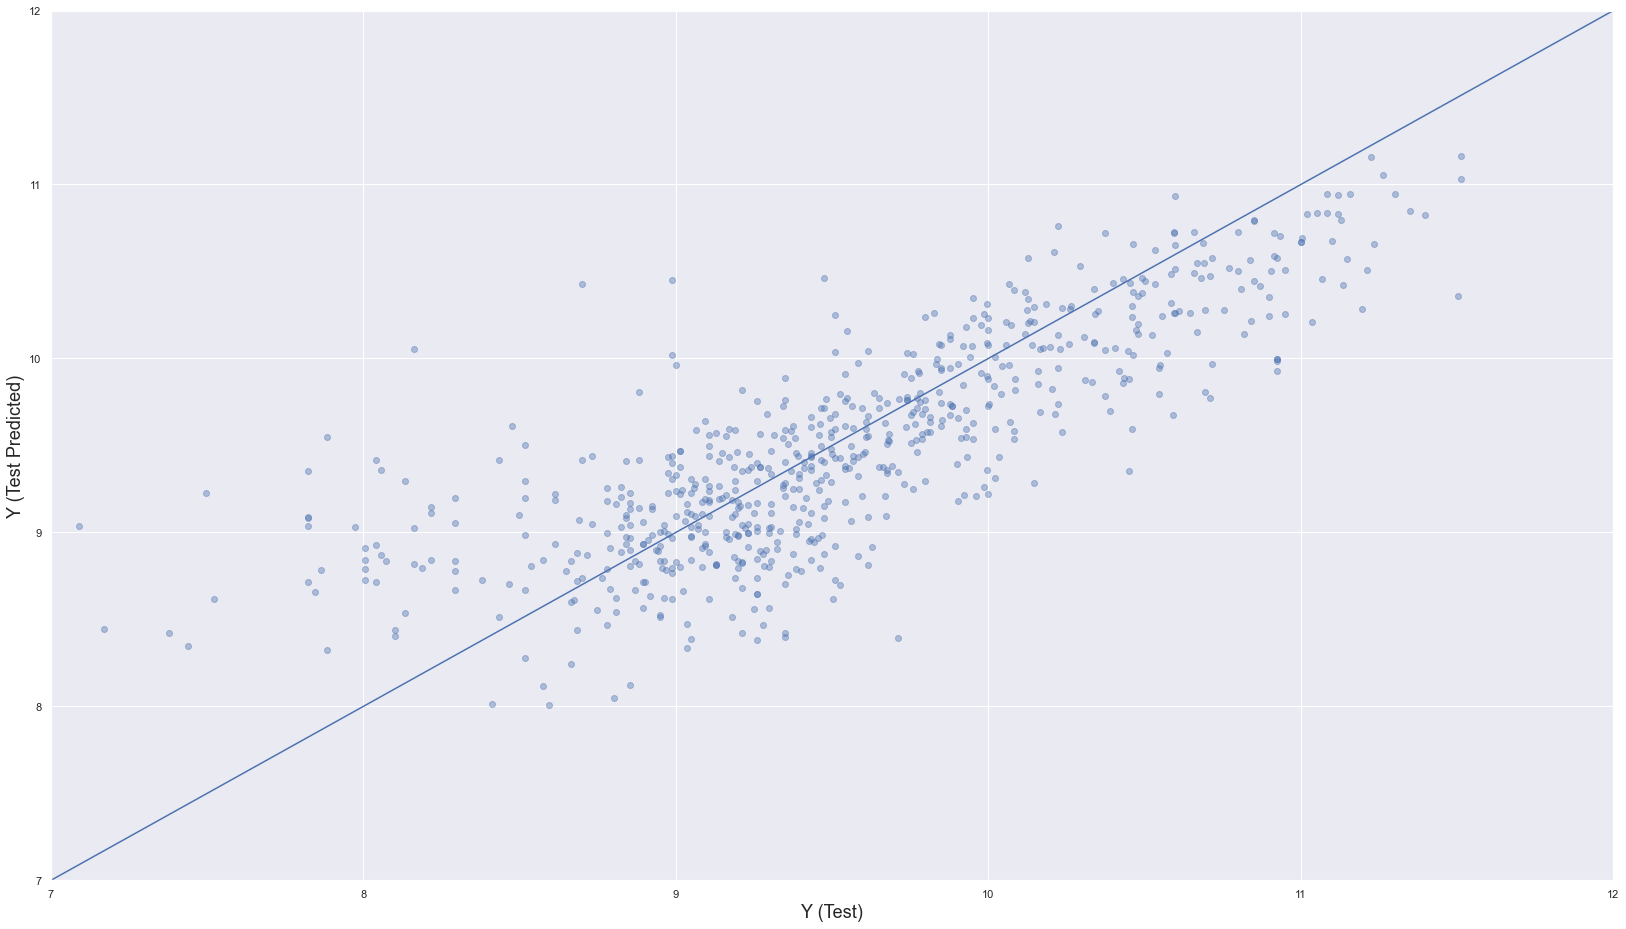

In [236]:
plt.scatter(y_testing,y_hat_testing,alpha=0.4)
plt.axline([0, 0], [1, 1])
plt.xlabel('Y (Test)',size=18)
plt.ylabel('Y (Test Predicted)',size=18)
plt.xlim(7,12)
plt.ylim(7,12)
plt.show()

Text(0.5, 1.0, 'Probability Density Function (PDF) Residual for testing')

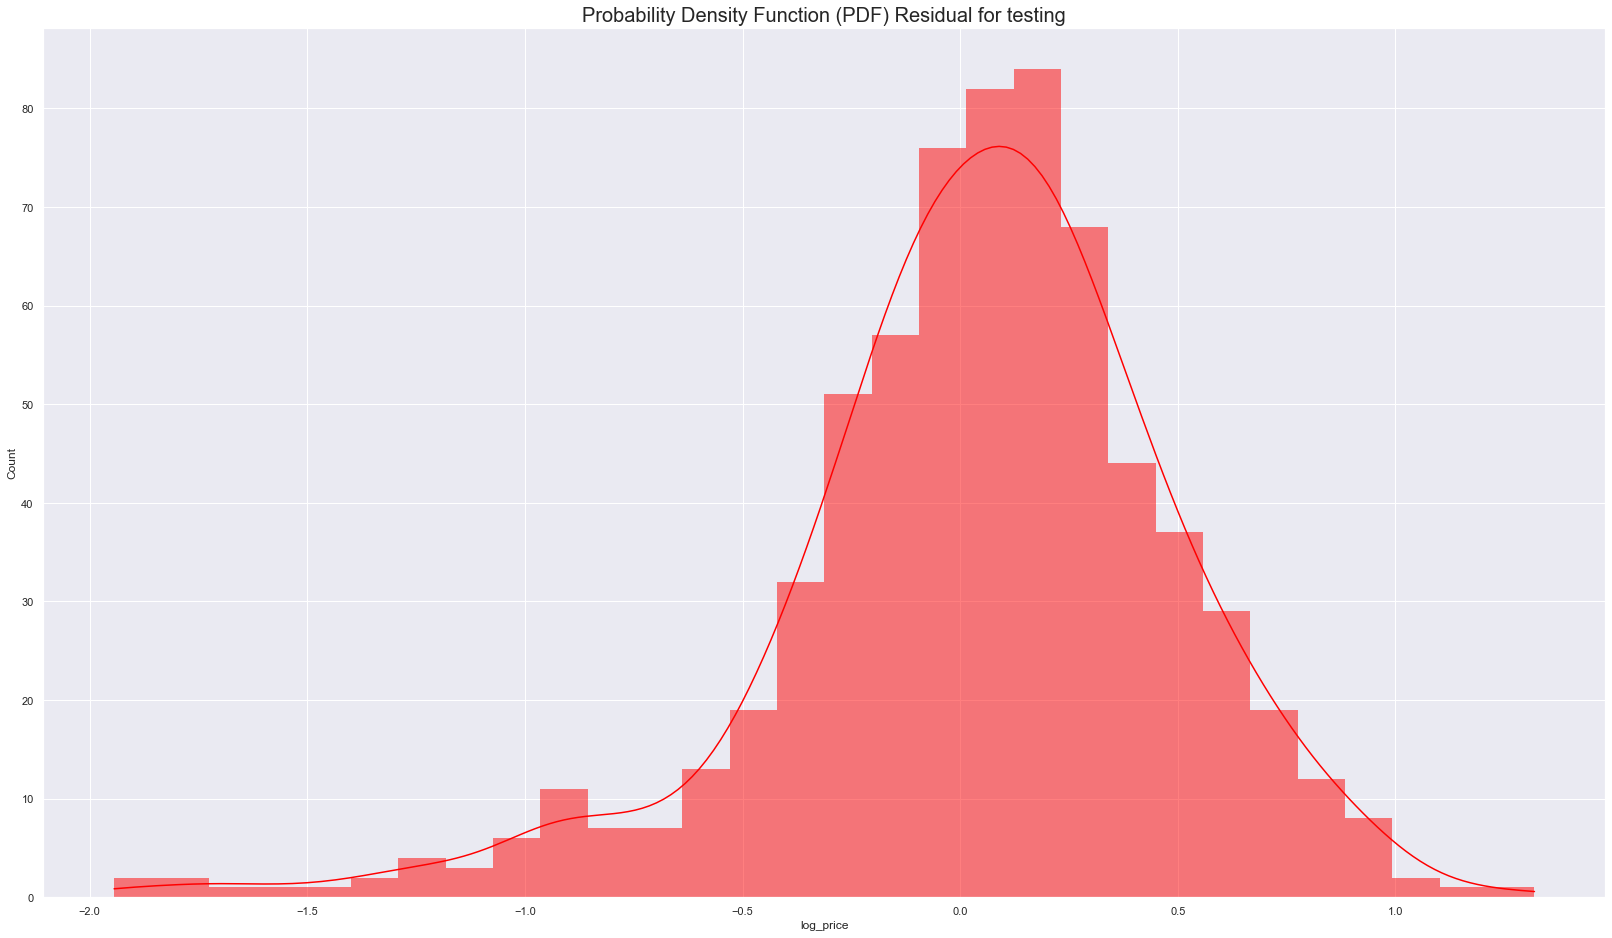

In [237]:
sns.histplot(y_testing-y_hat_testing, color="red", kde=True,  linewidth=0)
plt.title("Probability Density Function (PDF) Residual for testing",size=20)